# Decision Tree - 분류

Decision Tree <br>
학습 대상 : rule set <br> 
학습 원리 : entropy or gini<br>



criterion은 hyperparameter영역으로 <br>
entropy or gini 둘 중 어떤 것이 좋은 성능을 낼지 수행해보기 전엔 알 수 없다. <br>

----
[예시]<BR>
y label이 5:5 비율로 '빨','파'로 구성되어 있는 상태에서, <BR>
Feature 한개를 특정하여 분기를 고려해보려한다.<BR>
이때 특정된 Feature은 C1, C2 두개의 값으로 구성되어있다고 하자. <BR><BR>

```엔트로피```<BR>
엔트로피는 분리정보이득을 이용하여 불순도를 구한다<BR>
분리정보이득 : 질문 전 불순도 - 질문 후 불순도<BR>

- 질문 전 엔트로피(엔트로피 =1)

    -P('빨') * E['빨'] - P('파') * E['파'] <br>
    * E[p] = -log(p(x)) <br>

  <BR><BR>
  
- 질문 후 엔트로피
  
    C1 X ( -P('빨') * E['빨'] -P('파') * E['파']) <BR> +

    C2  X ( -P('빨') * E['빨'] -P('파') * E['파']) <BR>


<BR><BR>

```지니지수``` <BR>
지니는 특정지니지수를 이용하여 불순도를 구한다. <br>
분리된 각 노드별 지니지수를 계산, 제곱합으로 구한다.<br>
<br>

 C1 : P('빨')² + P('파')²     ```𝜶``` <br>
 C2 : P('빨')² + P('파')²      ```𝜷``` <br>
<br>

두개의 결과를 합산하여 특정지니 지수 계산 <br>
특정지니지수 : (C1 * ```𝜶```  ) + (C2 * ```𝜷``` ) <br>

산출된 특정지니 지수를 1에서 빼줌으로써 지니지수를 구한다. <br>
지니지수 : 1 - 특정지니지수


In [1]:
import warnings
warnings.filterwarnings('ignore')

## 실습용 데이터 설정
* iris.csv

In [2]:
import seaborn as sns

DF = sns.load_dataset('iris')

* pandas DataFrame

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
DF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


# I. 탐색적 데이터 분석

> ## 1) 빈도분석

In [5]:
DF.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

> ## 2) 분포 시각화

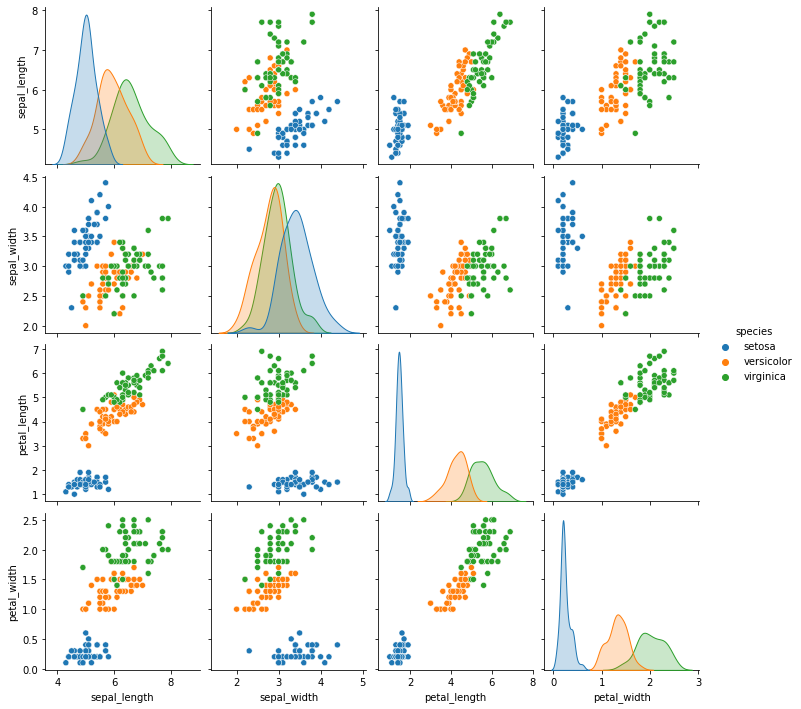

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data = DF,
             hue = 'species')
plt.show()

# II. Data Preprocessing

> ## 1) Data Set

In [7]:
X = DF[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = DF['species']

> ## 2) train_test_split( )

* 7 : 3

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (105, 4) (105,)
Test Data :  (45, 4) (45,)


# III. Modeling

> ## 1) Model 학습

DecisionTree의 Default Parameter은 <br>
모든 말단의 노드들의 gini 지수가 0 이 될 때까지 분리하게 되어있다. <br>


In [9]:
from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2045)

> ## 2) Model Visualization

- Visual Alt1

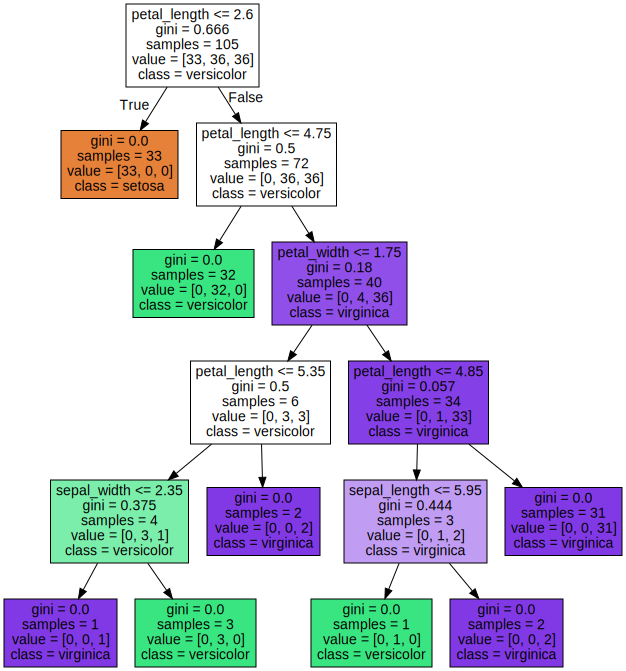

In [10]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_dt,
                                class_names = (['setosa', 'versicolor', 'virginica']),
                                feature_names = (['sepal_length', 'sepal_width', 'petal_length', 'petal_width']),
                                filled = True))

- Visual Alt2

In [15]:
from sklearn.tree import export_text

#텍스트로확인
export_text(Model_dt, feature_names = (['sepal_length','sepal_width','petal_length','petal_width']))

'|--- petal_length <= 2.60\n|   |--- class: setosa\n|--- petal_length >  2.60\n|   |--- petal_length <= 4.75\n|   |   |--- class: versicolor\n|   |--- petal_length >  4.75\n|   |   |--- petal_width <= 1.75\n|   |   |   |--- petal_length <= 5.35\n|   |   |   |   |--- sepal_width <= 2.35\n|   |   |   |   |   |--- class: virginica\n|   |   |   |   |--- sepal_width >  2.35\n|   |   |   |   |   |--- class: versicolor\n|   |   |   |--- petal_length >  5.35\n|   |   |   |   |--- class: virginica\n|   |   |--- petal_width >  1.75\n|   |   |   |--- petal_length <= 4.85\n|   |   |   |   |--- sepal_length <= 5.95\n|   |   |   |   |   |--- class: versicolor\n|   |   |   |   |--- sepal_length >  5.95\n|   |   |   |   |   |--- class: virginica\n|   |   |   |--- petal_length >  4.85\n|   |   |   |   |--- class: virginica\n'

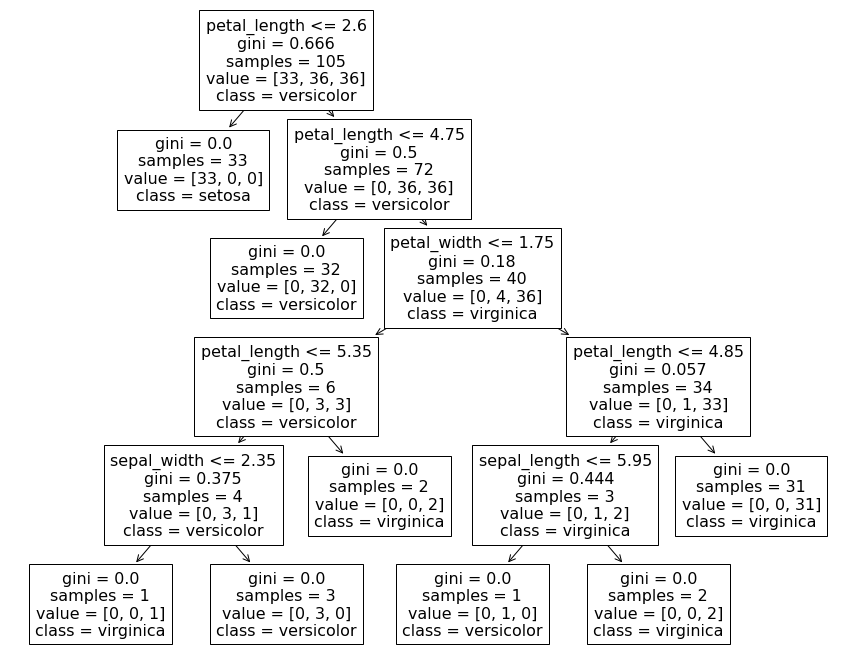

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize= (15,12))
#시각화로 확인
plot_tree(Model_dt, 
          feature_names = (['sepal_length','sepal_width','petal_length','petal_width'])
                                                    ,class_names =(['setosa','versicolor','virginica']))
# max_depth : 시각화 깊이 지정, _names : 데이터변수명 매칭, precision : 소수점자리 지정
plt.show()

> ## 3) 예측값 생성

In [20]:
y_hat = Model_dt.predict(X_test)

y_hat

array(['setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica'],
      dtype=object)

> ## 4) Model 평가

* Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 12]])

* Scores

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['setosa', 'versicolor', 'virginica'],
                            digits = 5))

              precision    recall  f1-score   support

      setosa    1.00000   1.00000   1.00000        17
  versicolor    0.87500   1.00000   0.93333        14
   virginica    1.00000   0.85714   0.92308        14

    accuracy                        0.95556        45
   macro avg    0.95833   0.95238   0.95214        45
weighted avg    0.96111   0.95556   0.95533        45



# IV. Pruning(가지치기)

* min_samples_split : 분할을 위한 최소한의 샘플데이터 개수
* min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플데이터 개수
* max_leaf_nodes : 말단 노드의 최대 개수
* max_depth : 트리모델의 최대 깊이를 지정

가지치기 규칙이 너무 많아지면, 원인규명이 어려워지기때문에 <br>
통상 두가지 정도 사용 


> ## 1) Model Pruning

In [23]:
from sklearn.tree import DecisionTreeClassifier

Model_pr = DecisionTreeClassifier(max_depth = 3,
                                  random_state = 2045)
Model_pr.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2045)

> ## 2) Model Visualization

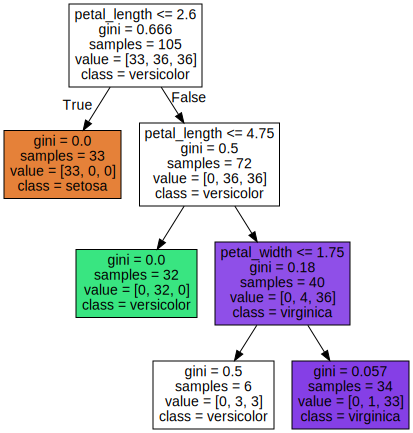

In [24]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_pr,
                                class_names = (['setosa', 'versicolor', 'virginica']),
                                feature_names = (['sepal_length', 'sepal_width', 'petal_length', 'petal_width']),
                                filled = True))

> ## 3) Model 평가

* Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix

y_hat = Model_pr.predict(X_test)

print(confusion_matrix(y_test, y_hat))

[[17  0  0]
 [ 0 14  0]
 [ 0  2 12]]


* Scores

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['setosa', 'versicolor', 'virginica'],
                            digits = 5))

              precision    recall  f1-score   support

      setosa    1.00000   1.00000   1.00000        17
  versicolor    0.87500   1.00000   0.93333        14
   virginica    1.00000   0.85714   0.92308        14

    accuracy                        0.95556        45
   macro avg    0.95833   0.95238   0.95214        45
weighted avg    0.96111   0.95556   0.95533        45



# V. Feature Importance

> ## 1) Feature Importance 확인

In [27]:
Model_pr.feature_importances_

array([0.        , 0.        , 0.96524977, 0.03475023])

> ## 2) Feature Importance 시각화

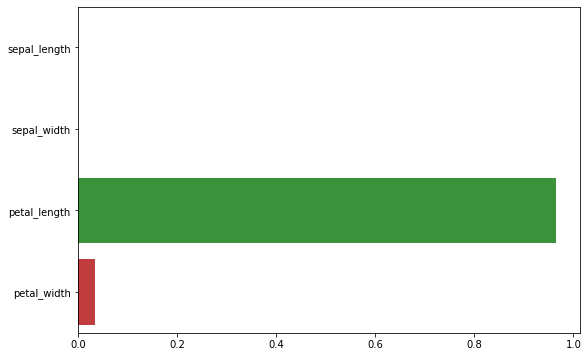

In [30]:
plt.figure(figsize = (9, 6))
sns.barplot(x = Model_pr.feature_importances_,
            y =['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

# 
# 
# 
# The End
# 
# 
# 